In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn

from sklearn.model_selection import train_test_split


In [4]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#유방암 데이터셋
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.target_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

print("Training Accuracy: {:.2f}".format(tree.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(tree.score(X_test,y_test)))
# => 과적합 문제 발견

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
Training Accuracy: 1.00
Test Accuracy: 0.93


In [5]:
#과적합을 방지하기위해 Max_depth 제한

tree = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)

print("Training Accuracy: {:.2f}".format(tree.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(tree.score(X_test,y_test)))


Training Accuracy: 1.00
Test Accuracy: 0.95


C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)


[Text(189.42631578947368, 195.696, 'mean concave points <= 0.051\nsamples = 426\nvalue = [158, 268]\nclass = 양성'),
 Text(114.53684210526316, 152.208, 'worst radius <= 16.83\nsamples = 267\nvalue = [16, 251]\nclass = 양성'),
 Text(70.48421052631579, 108.72, 'radius error <= 0.626\nsamples = 249\nvalue = [5, 244]\nclass = 양성'),
 Text(35.242105263157896, 65.232, 'worst smoothness <= 0.178\nsamples = 246\nvalue = [3, 243]\nclass = 양성'),
 Text(17.621052631578948, 21.744, 'samples = 245\nvalue = [2, 243]\nclass = 양성'),
 Text(52.863157894736844, 21.744, 'samples = 1\nvalue = [1, 0]\nclass = 악성'),
 Text(105.72631578947369, 65.232, 'symmetry error <= 0.025\nsamples = 3\nvalue = [2, 1]\nclass = 악성'),
 Text(88.10526315789474, 21.744, 'samples = 2\nvalue = [2, 0]\nclass = 악성'),
 Text(123.34736842105264, 21.744, 'samples = 1\nvalue = [0, 1]\nclass = 양성'),
 Text(158.58947368421053, 108.72, 'worst texture <= 19.91\nsamples = 18\nvalue = [11, 7]\nclass = 악성'),
 Text(140.96842105263158, 65.232, 'samples 

C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0, flags=flags)


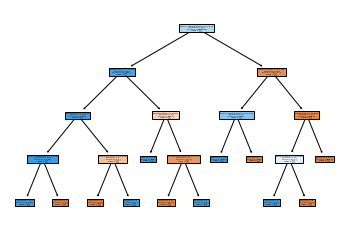

In [6]:
#Tree 시각화
#export_graphviz() 함수 이용

from sklearn.tree import export_graphviz

from sklearn.tree import plot_tree
plot_tree(tree,class_names=["악성","양성"], feature_names=cancer.feature_names, impurity=False, filled=True)


특성중요도
 [1.]


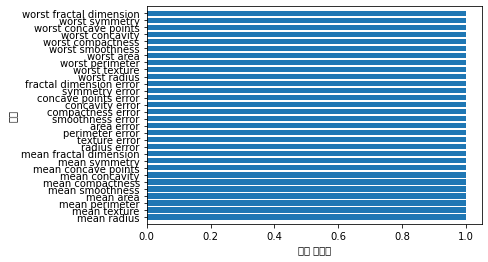

In [29]:
#Tree의 특성 중요도 feature_importances_ 속성
print("특성중요도\n",tree.feature_importances_)

#시각화
def plot_feature_importances_cancer(model):
    from sklearn.datasets import load_breast_cancer
    cancer = load_breast_cancer()
    n_feature = cancer.data.shape[1] #특성의 수
    plt.barh(np.arange(n_feature),model.feature_importances_, align='center') #차트 생성
    plt.yticks(np.arange(n_feature),cancer.feature_names) #y축 특성이름 지정
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feature)
plot_feature_importances_cancer(tree)

Index(['Unnamed: 0', 'date', 'price'], dtype='object')
0      1957.00
1      1959.00
2      1960.00
3      1965.00
4      1970.00
        ...   
328    2015.58
329    2015.67
330    2015.75
331    2015.83
332    2015.92
Name: date, Length: 333, dtype: float64


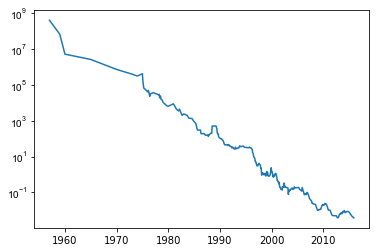

In [17]:
#Decision Tree의 회기
# 결정트리의 회기는 훈련데이터 범위내의 데이터만 예측가능함

import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
print(ram_prices.keys()) #날짜와 가격 항목을 가지고 있는 데이터셋
print(ram_prices.date)
plt.yticks(fontname ="Arial")
plt.semilogy(ram_prices.date, ram_prices.price) #로그스케일을 적용하여 보기쉽게 간소화


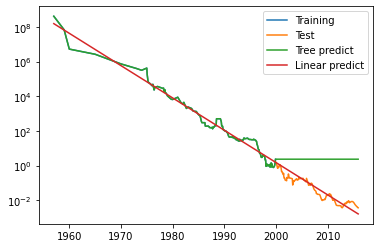

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date <2000] #2000년도 이하 훈련 데이터셋
data_test = ram_prices[ram_prices.date>=2000] # 테스트 데이터셋

X_train = data_train.date.to_numpy()[:, np.newaxis] # 날짜 특성만 추출
y_train = np.log(data_train.price) #로그스케일 적용

tree = DecisionTreeRegressor().fit(X_train,y_train)
lr = LinearRegression().fit(X_train,y_train)

#예측은 전체기간
X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = lr.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label='Training')
plt.semilogy(data_test.date, data_test.price, label='Test')

plt.semilogy(ram_prices.date, price_tree, label='Tree predict')
plt.semilogy(ram_prices.date, price_lr, label='Linear predict')
plt.legend()